# Data Exploration: Transactions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from helpers import RAW_DATA_DIR, TRANSFORMED_DATA_DIR

## Exploration

In [2]:
df_transactions = pd.read_parquet(RAW_DATA_DIR / 'transactions_KL.parquet')
df_transactions

,project_name,spa_date,address,building_type,tenure,floors,rooms,land_area,built_up,price_psf,price
0,BANDAR BARU SRI PETALING,09/06/2023,"✕✕✕, JALAN PIKRAMA",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,1,nan,"2,196 ft²",nan,342,"750,000"
1,BANDAR BARU SRI PETALING,01/06/2023,"✕✕. ✕✕, JALAN PERLAK 3",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,2,nan,753 ft²,nan,398,"300,000"
2,BANDAR BARU SRI PETALING,29/05/2023,"✕✕ ✕, JALAN 12/149L",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,2½,nan,"3,197 ft²",nan,188,"600,000"
3,BANDAR BARU SRI PETALING,25/05/2023,"✕✕. ✕✕✕, JALAN PASAI",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,2,nan,753 ft²,nan,531,"400,000"
4,BANDAR BARU SRI PETALING,22/05/2023,"✕✕, JALAN SRI PETALING 5",SEMI-D,LEASEHOLD,2½,nan,"4,801 ft²",nan,250,"1,200,000"
...,...,...,...,...,...,...,...,...,...,...,...
294562,HERITAGE STATION HOTEL,13/11/1990,"✕✕✕-✕✕✕, BB WANGSA MAJU",FLAT,LEASEHOLD,1,2,493 ft²,493 ft²,71,"35,000"
294563,IDAMAN PUTERI,10/01/2005,"✕✕-✕, JALAN GOMBAK",CONDOMINIUM,FREEHOLD,1,3,1454 ft²,1454 ft²,150,"218,025"
294564,KELAB LE CHATEAU II,25/02/2008,"✕-✕✕-✕, JALAN KIARA 3",CONDOMINIUM,FREEHOLD,1,3,593 ft²,593 ft²,194,"115,000"
294565,MUTIARA SENTUL CONDOMINIUM,10/08/2009,"✕-✕-✕, OFF JALAN SENTUL",APARTMENT,LEASEHOLD,1,2,1193 ft²,1193 ft²,197,"235,000"


In [3]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294567 entries, 0 to 294566
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   project_name   294567 non-null  object
 1   spa_date       294567 non-null  object
 2   address        294546 non-null  object
 3   building_type  294567 non-null  object
 4   tenure         294567 non-null  object
 5   floors         294567 non-null  object
 6   rooms          294567 non-null  object
 7   land_area      294567 non-null  object
 8   built_up       294567 non-null  object
 9   price_psf      294567 non-null  object
 10  price          294567 non-null  object
dtypes: object(11)
memory usage: 24.7+ MB


At a glance:
1. `project_name` column contains strings. Rename to `township` for more column meaningful name. No missing values.
2. `spa_date` is detected as strings instead of date, need to change to date type. No missing values. 
3. `address` column contain strings. There are missing values.
4. `building_type` column contains strings. No missing values.
5. `tenure` column contains strings. No missing values.
6. `floors` is detected as strings instead of float, need to change to float type. No missing values.
7. `rooms` is automatically detected as float. There are 'nan' but not detected as missing values.
8. `land_area` is detected as strings instead of float, need to change to float type. No missing values.
9. `built_up` is detected as strings instead of float, need to change to float type. There are missing values.
10. `price` is detected as strings instead of float, need to change to float type. No missing values.

In [4]:
df_transactions = df_transactions.rename(columns={'project_name': 'township'})
df_transactions.head()

,township,spa_date,address,building_type,tenure,floors,rooms,land_area,built_up,price_psf,price
0,BANDAR BARU SRI PETALING,09/06/2023,"✕✕✕, JALAN PIKRAMA",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,1,nan,"2,196 ft²",nan,342,"750,000"
1,BANDAR BARU SRI PETALING,01/06/2023,"✕✕. ✕✕, JALAN PERLAK 3",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,2,nan,753 ft²,nan,398,"300,000"
2,BANDAR BARU SRI PETALING,29/05/2023,"✕✕ ✕, JALAN 12/149L",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,2½,nan,"3,197 ft²",nan,188,"600,000"
3,BANDAR BARU SRI PETALING,25/05/2023,"✕✕. ✕✕✕, JALAN PASAI",TERRACE HOUSE - INTERMEDIATE,LEASEHOLD,2,nan,753 ft²,nan,531,"400,000"
4,BANDAR BARU SRI PETALING,22/05/2023,"✕✕, JALAN SRI PETALING 5",SEMI-D,LEASEHOLD,2½,nan,"4,801 ft²",nan,250,"1,200,000"


In [5]:
df_transactions['spa_date'] = pd.to_datetime(df_transactions['spa_date'], format='%d/%m/%Y')
df_transactions['spa_date'].sort_values()

56134    1909-05-11
128655   1933-10-25
262130   1955-07-25
64404    1959-07-27
266269   1960-11-14
            ...    
224137   2023-06-09
266662   2023-06-13
87238    2023-06-13
214691   2023-06-14
125442   2023-06-19
Name: spa_date, Length: 294567, dtype: datetime64[ns]

The data type of the `spa_date` column has been changed to datetime type.

% missing values: 0.0071291081485706145


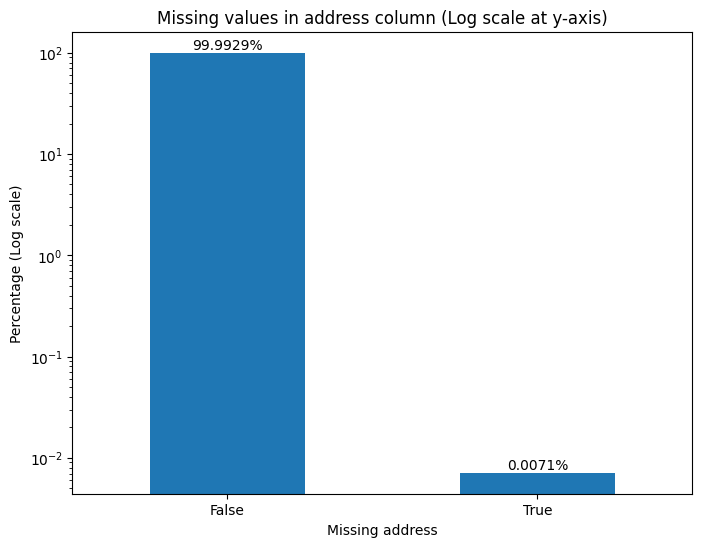

In [165]:
print(f"% missing values: {df_transactions['address'].isnull().sum() / len(df_transactions) * 100}")
ax = df_transactions['address'].isnull().value_counts(normalize=True).apply(lambda x: 100 * x).plot(
    kind='bar',
    logy=True,
    ylabel='Percentage (Log scale)',
    xlabel='Missing address',
    title='Missing values in address column (Log scale at y-axis)',
    figsize=(8, 6),
    rot=0
)
ax.bar_label(ax.containers[0], fmt='%.4f%%')
plt.show()

We can drop the `address` column based on the following reasons:
1. No detailed locational scope is considered in this study
2. Only high-level geographical scope is considered

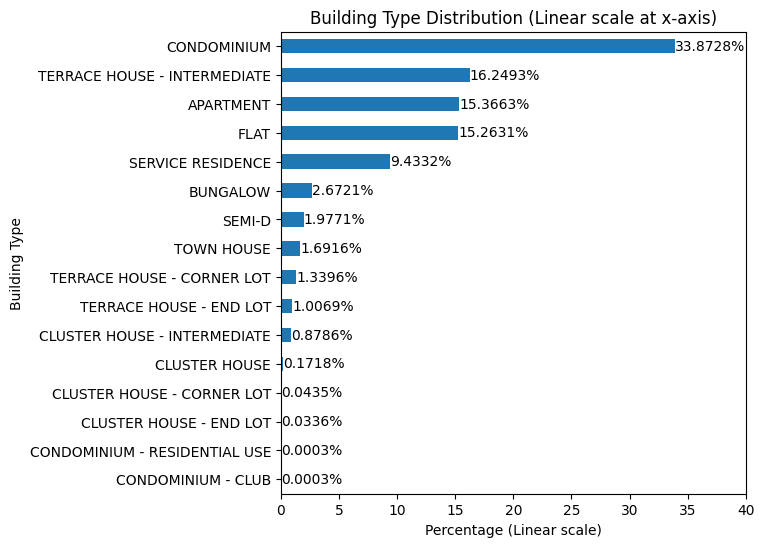

In [192]:
ax = df_transactions['building_type'].value_counts(normalize=True).apply(lambda x: x * 100).sort_values().plot(
    kind='barh',
    # logx=True,
    xlabel='Percentage (Linear scale)',
    ylabel='Building Type',
    title='Building Type Distribution (Linear scale at x-axis)',
    figsize=(6, 6),
    xlim=(0, 40),
)
ax.bar_label(ax.containers[0], fmt='%.4f%%')
# x0, x1, y0, y1 = ax.axis()
# ax.axis((x0, x1 + 4.5, y0, y1))
plt.show()

Findings:
1. Majority of the transactions are condominium, followed by intermediate terrace house and apartment
2. Cluster house has an unknown category which does not fall into intermediate, corner lot or end lot.
3. Condominium has a weird category called "residential use", but only has one transaction

% Freehold: 61.22987300003055


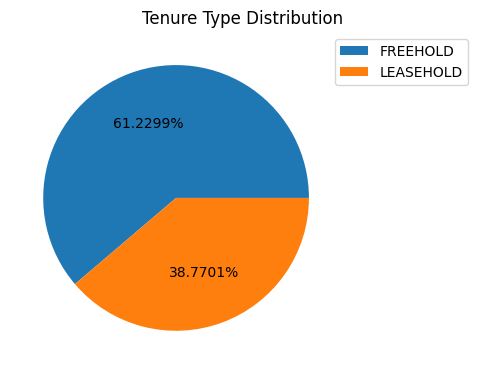

In [196]:
print(f"% Freehold: {df_transactions['tenure'].value_counts()['FREEHOLD'] / len(df_transactions) * 100}")
ax = df_transactions['tenure'].value_counts().plot(
    kind='pie', 
    autopct='%.4f%%',
    ylabel='',
    labels=None,
    title='Tenure Type Distribution',
    legend=True,
    figsize=(6, 6),
)
x0, x1, y0, y1 = ax.axis()
ax.axis((x0, x1 + 1, y0, y1))
plt.show()

Findings:
1. Majority of the transactions are freehold (61.23%)

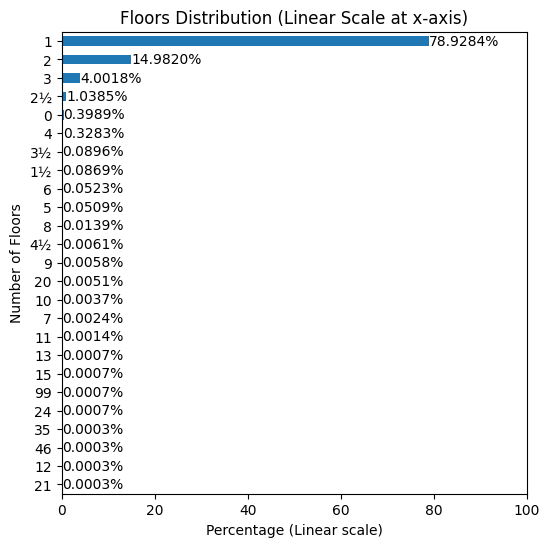

In [197]:
ax = df_transactions['floors'].value_counts(normalize=True).apply(lambda x: x * 100).sort_values().plot(
    kind='barh',
    # logx=True,
    xlabel='Percentage (Linear scale)',
    ylabel='Number of Floors',
    figsize=(6, 6),
    xlim=(0, 100),
    title='Floors Distribution (Linear Scale at x-axis)'
)
ax.bar_label(ax.containers[0], fmt='%.4f%%')
# x0, x1, y0, y1 = ax.axis()
# ax.axis((x0, x1 + 250, y0, y1))
plt.show()

In [22]:
print(df_transactions['floors'].isnull().sum())
print((df_transactions['floors'] == 'nan').sum())

0
0


Findings:
1. Half a floor are represented by 1/2 instead of .5
2. There are weird values like:
    - 0 floor
    - 99 floors
3. Majority of floors are 2 floors
4. No missing values

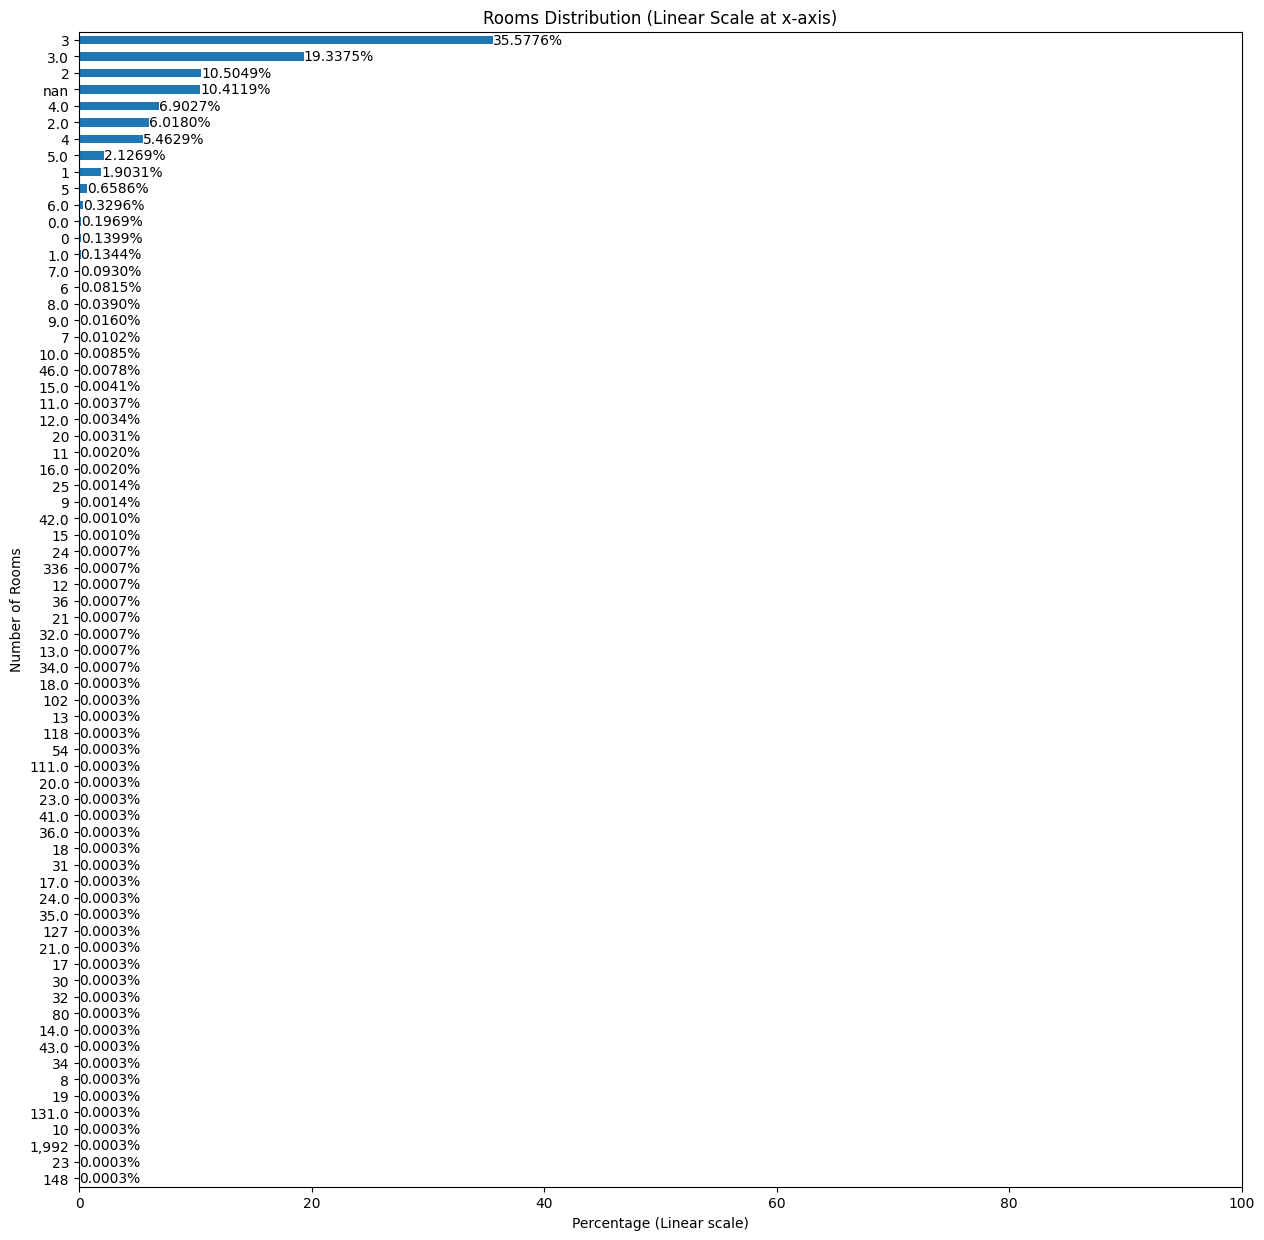

In [199]:
ax = df_transactions['rooms'].value_counts(normalize=True).apply(lambda x: 100 *x).sort_values().plot(
    kind='barh',
    # logx=True,
    xlabel='Percentage (Linear scale)',
    ylabel='Number of Rooms',
    figsize=(15, 15),
    xlim=(0, 100),
    title='Rooms Distribution (Linear Scale at x-axis)'
)
ax.bar_label(ax.containers[0], fmt='%.4f%%')
# x0, x1, y0, y1 = ax.axis()
# ax.axis((x0, x1 + 15, y0, y1))
plt.show()

In [59]:
(df_transactions['rooms'] == 'nan').sum() / len(df_transactions) * 100

10.411892710317177

Findings:
1. Weird number of rooms:
    - 0 room
    - 46 rooms
2. Majority of the transactions are 3 rooms
3. 10.45% of the transactions have NaN

In [71]:
df_transactions['land_area'].value_counts().sort_values()

land_area
5593 ft²         1
13,535 ft²       1
6081 ft²         1
12,146 ft²       1
12,134 ft²       1
              ... 
1,540 ft²     1882
592 ft²       2146
1,539 ft²     2388
883 ft²       3218
1,647 ft²     3652
Name: count, Length: 9147, dtype: int64

In [15]:
df_transactions['land_area'].isnull().sum() / len(df_transactions) * 100

0.0

Findings:
1. There are "ft2" and "," in land_area. Need to remove.
2. No missing values

In [16]:
df_transactions['built_up'].value_counts()

built_up
nan          5613
861 ft²      1849
1000 ft²     1670
549 ft²      1452
556 ft²      1445
             ... 
1,031 ft²       1
113 ft²         1
5,414 ft²       1
5197 ft²        1
5593 ft²        1
Name: count, Length: 7610, dtype: int64

In [17]:
(df_transactions['built_up'] == 'nan').sum() / len(df_transactions) * 100

1.9055087637108028

Findings:
1. 1.91% of the data is missing. Need further investigation
2. There are "ft2" and "," in the data. Need to remove them

In [18]:
df_transactions['price_psf'].value_counts()

price_psf
152      1246
155      1241
71       1123
139      1104
143      1092
         ... 
1,645       1
1,980       1
3,099       1
1,578       1
2,326       1
Name: count, Length: 2144, dtype: int64

In [19]:
df_transactions['price_psf'].isna().sum() / len(df_transactions) * 100

0.0

Findings:
1. No missing values
2. Have "," in the numbers. Need to remove them

In [20]:
df_transactions['price'].value_counts()

price
200,000    3603
150,000    3587
300,000    3511
250,000    3382
500,000    3181
           ... 
101,800       1
123,620       1
73,360        1
554,338       1
518,296       1
Name: count, Length: 18778, dtype: int64

In [21]:
df_transactions['price'].isna().sum() / len(df_transactions) * 100

0.0

Findings:
1. No missing data.
2. Have "," in the data. Need to remove.

### Concluding Remarks
1. How does each dataset look like? Is it in row format or it has merged cells?
    - It is in row format, with no merged cells.
2. What is the start and end of each dataset?
    - From 1909 to 2023
3. Is the dataset from the area of interest, Kuala Lumpur?
    - Yes
4. How is the data quality?
    - There are missing values in some columns (`built_up` and `rooms`). Need to decide to remove rows or impute.
    - Values in some columns (`land_area` and `built_up`) has unit of measurement like "ft2". Need to remove.
    - Values in `floors` column uses fraction instead of decimal. Need to change.
    - Values in numerical columns (`land_area`, `built_up`, `price_psf` and `price`) has comma. Need to remove.
    - Some values in some columns (`floors` and `rooms`) does not make sense. Need further investigation.
    - Only landed properties are in the dataset. Need another round of scraping for high rise real estate.

In [22]:
df_transactions.to_parquet(TRANSFORMED_DATA_DIR / 'transactions_KL_ckpt1.parquet', index=False)